In [1]:
import numpy as np
import scipy.io as scio
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

%matplotlib inline

In [2]:
# BA = nx.random_graphs.barabasi_albert_graph(2000, 3)
# BA_2000_3 = nx.to_numpy_matrix(BA)
# network_physical = BA_2000_3
# network_scale_1 = network_physical.shape

In [3]:
# np.sum(np.sum(network_physical, axis=0)==0)

In [4]:
# np.sum(np.sum(network_physical, axis=0))

In [5]:
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

In [6]:
# 网络数据导入为numpy数组
dataFile_1 = '../../Matlab/data/BA_2000_3.mat'
data_1 = scio.loadmat(dataFile_1)
network_scale_1 = data_1['A'].shape
network_physical = np.array(data_1['A'])

assert check_symmetric(network_physical), "network doesn\'t symmetry!"
np.sum(np.sum(network_physical, axis=0)==0)

0

In [7]:
# 参数设置

# 公共参数
time_steps = 50    # 总的时间步数
N = network_scale_1[0]    # 网络节点数
p = random.randint(0, N-1)    # 初始始随机选出一个感染节点，四舍五入

# SIR参数
bata = 0.3    # 感染概率
mu = 0.5    # 免疫概率

Nodes_SIR = np.zeros([time_steps, N])    # N行代表时间步数，T列代表节点数，记录每步所有节点的状态

infective_count = np.zeros([time_steps])    # 每步感染节点数,用于最终统计
immune_count = np.zeros([time_steps])    # 每步免疫节点数,用于最终统计
s_count = np.zeros([time_steps])    # 每步免疫节点数,用于最终统计

Nodes_SIR[0, p] = 1    # 第一步标出初始感染节点的位置

In [8]:
for t in range(time_steps-1):

    # SIR演化
    for i in range(N):

        if Nodes_SIR[t, i] == 0:    # 0代表易感(S)，如果节点i健康，就看他有几个被感染的的邻居

            neighbor_total = np.where((network_physical[i, :] == 1))[0]    # 查找其邻居
            infective_nodes = np.where((Nodes_SIR[t, :] == 1))[0]
            neighbor_infective = np.intersect1d(infective_nodes, neighbor_total)    # 取交集，真正可以感染它的邻居
            Num_neighbor_infective = len(neighbor_infective)    # 统计

            # SIR感染率改变规则
            rate_temp = (1 - bata) ** Num_neighbor_infective

            # SIR感染过程
            v1 = 1 - rate_temp    # 这是最终计算的感染率
            x1 = np.random.rand(1)
            if x1 <= v1:
                Nodes_SIR[t+1, i] = 1

        # SIR免疫过程
        elif Nodes_SIR[t, i] == 1:

            x3 = np.random.rand(1) 
            if x3 <= mu:
                Nodes_SIR[t+1, i] = 2
            else:
                Nodes_SIR[t+1, i] = 1

        elif Nodes_SIR[t, i] == 2:
            Nodes_SIR[t+1, i] = 2

        else:
            print("There is an else in SIR!")

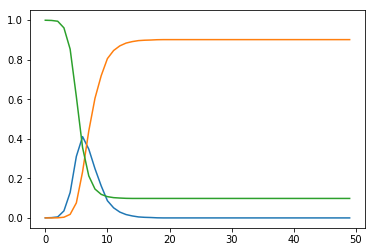

In [9]:
# 处理数据
for k in range(time_steps):
    infective_count[k] = np.sum(Nodes_SIR[k, :] == 1)
    immune_count[k] = np.sum(Nodes_SIR[k, :] == 2)
    s_count[k] = np.sum(Nodes_SIR[k, :] == 0)
    if (infective_count[k] + immune_count[k] + s_count[k] != N):
        print("sonethong wrong when counting...")

plt.plot(infective_count/N, label='SIR-I')
plt.plot(immune_count/N, label='SIR-R')
plt.plot(s_count/N, label='SIR-S')

In [ ]:
# 加上蒙特卡洛

In [ ]:
# 参数设置

# 公共参数
Monte_Carlo_loop = 20    # 蒙特卡洛模拟次数
time_steps = 50    # 总的时间步数
N = network_scale_1[0]    # 网络节点数
p = random.randint(0, N-1)    # 初始始随机选出一个感染节点，四舍五入

# SIR参数
bata = 0.3    # 感染概率
mu = 0.5    # 免疫概率

Nodes_SIR = np.zeros([Monte_Carlo_loop, time_steps, N])    # N行代表时间步数，T列代表节点数，记录每步所有节点的状态

infective_count = np.zeros([Monte_Carlo_loop, time_steps])    # 每步感染节点数,用于最终统计
infective_count_average = np.zeros([1, time_steps])

immune_count = np.zeros([Monte_Carlo_loop, time_steps])    # 每步免疫节点数,用于最终统计
immune_count_average = np.zeros([1, time_steps])

In [ ]:
time_start = time.time()

for loop in range(Monte_Carlo_loop):
    
    Nodes_SIR[loop, 0, p] = 1    # 第一步标出初始感染节点的位置

    for t in range(time_steps-1):

        # SIR演化
        for i in range(N):

            if Nodes_SIR[loop, t, i] == 0:    # 0代表易感(S)，如果上一步节点i健康，就看他的邻居有没有被感染的

                neighbor_total = np.where((network_physical[i, :] == 1))[0]    # 查找其邻居
                infective_nodes = np.where((Nodes_SIR[loop, t, :] == 1))[0]
                neighbor_infective = np.intersect1d(infective_nodes, neighbor_total)    # 取交集，真正可以感染它的邻居
                Num_neighbor_infective = len(neighbor_infective)    # 统计

                # SIR感染率改变规则
                rate_temp = (1 - bata) ** Num_neighbor_infective

                # SIR感染过程
                v1 = 1 - rate_temp    # 这是最终计算的感染率？
                x1 = np.random.rand(1)
                if x1 <= v1:
                    Nodes_SIR[loop, t+1, i] = 1

            # SIR康复过程
            elif Nodes_SIR[loop, t, i] == 1:

                x3 = np.random.rand(1) 
                if x3 <= mu:
                    Nodes_SIR[loop, t+1, i] = 2
                else:
                    Nodes_SIR[loop, t+1, i] = 1
            
            elif Nodes_SIR[loop, t, i] == 2:
                Nodes_SIR[loop, t+1, i] = 2
            
            else:
                print("There is a else condition happened.")

    print("loop {} - time has passed: {} ".format(loop, time.time()-time_start))

In [ ]:
# 处理数据
for i in range(Monte_Carlo_loop):
    for j in range(time_steps):
        infective_count[i,j] = np.sum(Nodes_SIR[i, j, :] == 1)
        immune_count[i,j] = np.sum(Nodes_SIR[i, j, :] == 2)
infective_count_average = np.mean(infective_count, axis=0)
immune_count_average = np.mean(immune_count, axis=0)

plt.plot(infective_count_average/N, label='SIR-I')
plt.plot(immune_count_average/N, label='SIR-R')